# **AP157 Image Processing Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Daffon, David D. \
_Student No._: 2021-04594\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

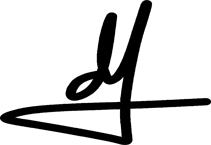

In [2]:
from IPython.display import Image #run cell to display e-sig
Image(filename="sig.png")

**DAVID D. DAFFON**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



##### Author's note

I first did some preliminary tests. In the first code cell succeeding this markdown, I tested out writing the sine functions to cast on my meshgrid. Some manipulation was performed on the sine so that they range from 0 to 255 (and that they don't go negative).

I then plotted the images in 2D and 3D view in the next two code cells. I switched the variables around to see if all 3 sinusoids have the correct images.

I don't like how the colormap <code>magma</code> looks because it reminds me of this summer's heat, so I used <code>RdPu_r</code> (<code>_r</code> to invert it since I want the bright pink on the peaks) because it looks cyberpunk.

In [4]:
N = 400 # Creating the meshgrid.
xx = np.linspace(0, 1, N)
X, Y = np.meshgrid(xx, xx)
A = 255

sin1 = (0.5*np.sin((2*np.pi*X)*1) + 0.5)*A # Defining the sinusoid functions.
sin2 = (0.5*np.sin((2*np.pi*X)*3) + 0.5)*A
sin3 = (0.5*np.sin((2*np.pi*X)*5) + 0.5)*A

(0.0, 400.01, 0.0, 400.01)

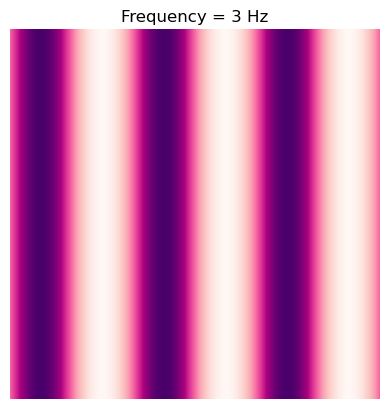

In [5]:
plt.imshow(sin2, cmap='RdPu') # Plotting the 2D image.

plt.title('Frequency = 3 Hz')

plt.xlim(0, 400.01)
plt.ylim(0, 400.01)
plt.axis('off')

Text(0.5, 0.92, '3D View of Sinusoid')

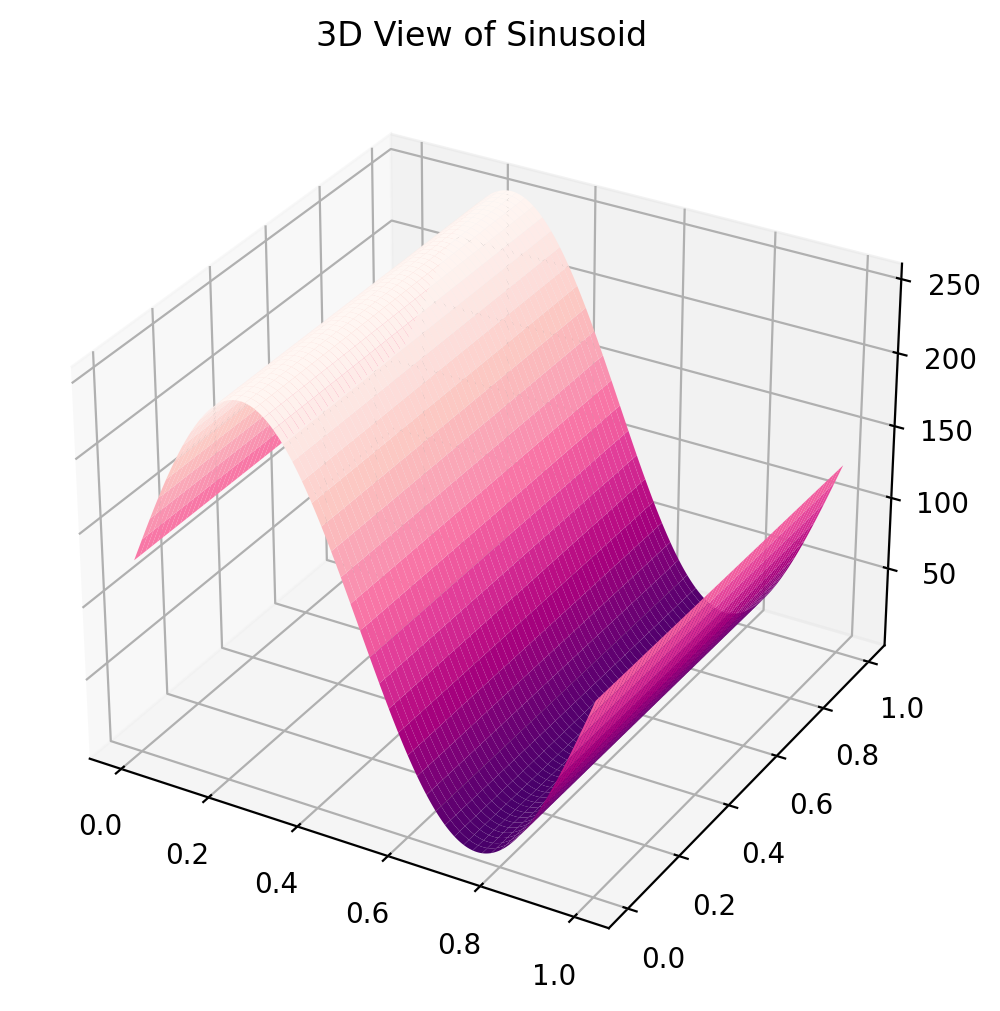

In [6]:
fig = plt.figure(figsize=(6, 6), dpi=200) # Plotting the 3D image.
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, sin1, cmap='RdPu_r')
ax.set_box_aspect(aspect=None)
ax.set_title("3D View of Sinusoid")

##### Author's note

Now, I am satisfied with the results of my preliminary attempts. For the sake of compactness, I use a for loop to create and plot all three 2D and 3D views of the sinusoids.

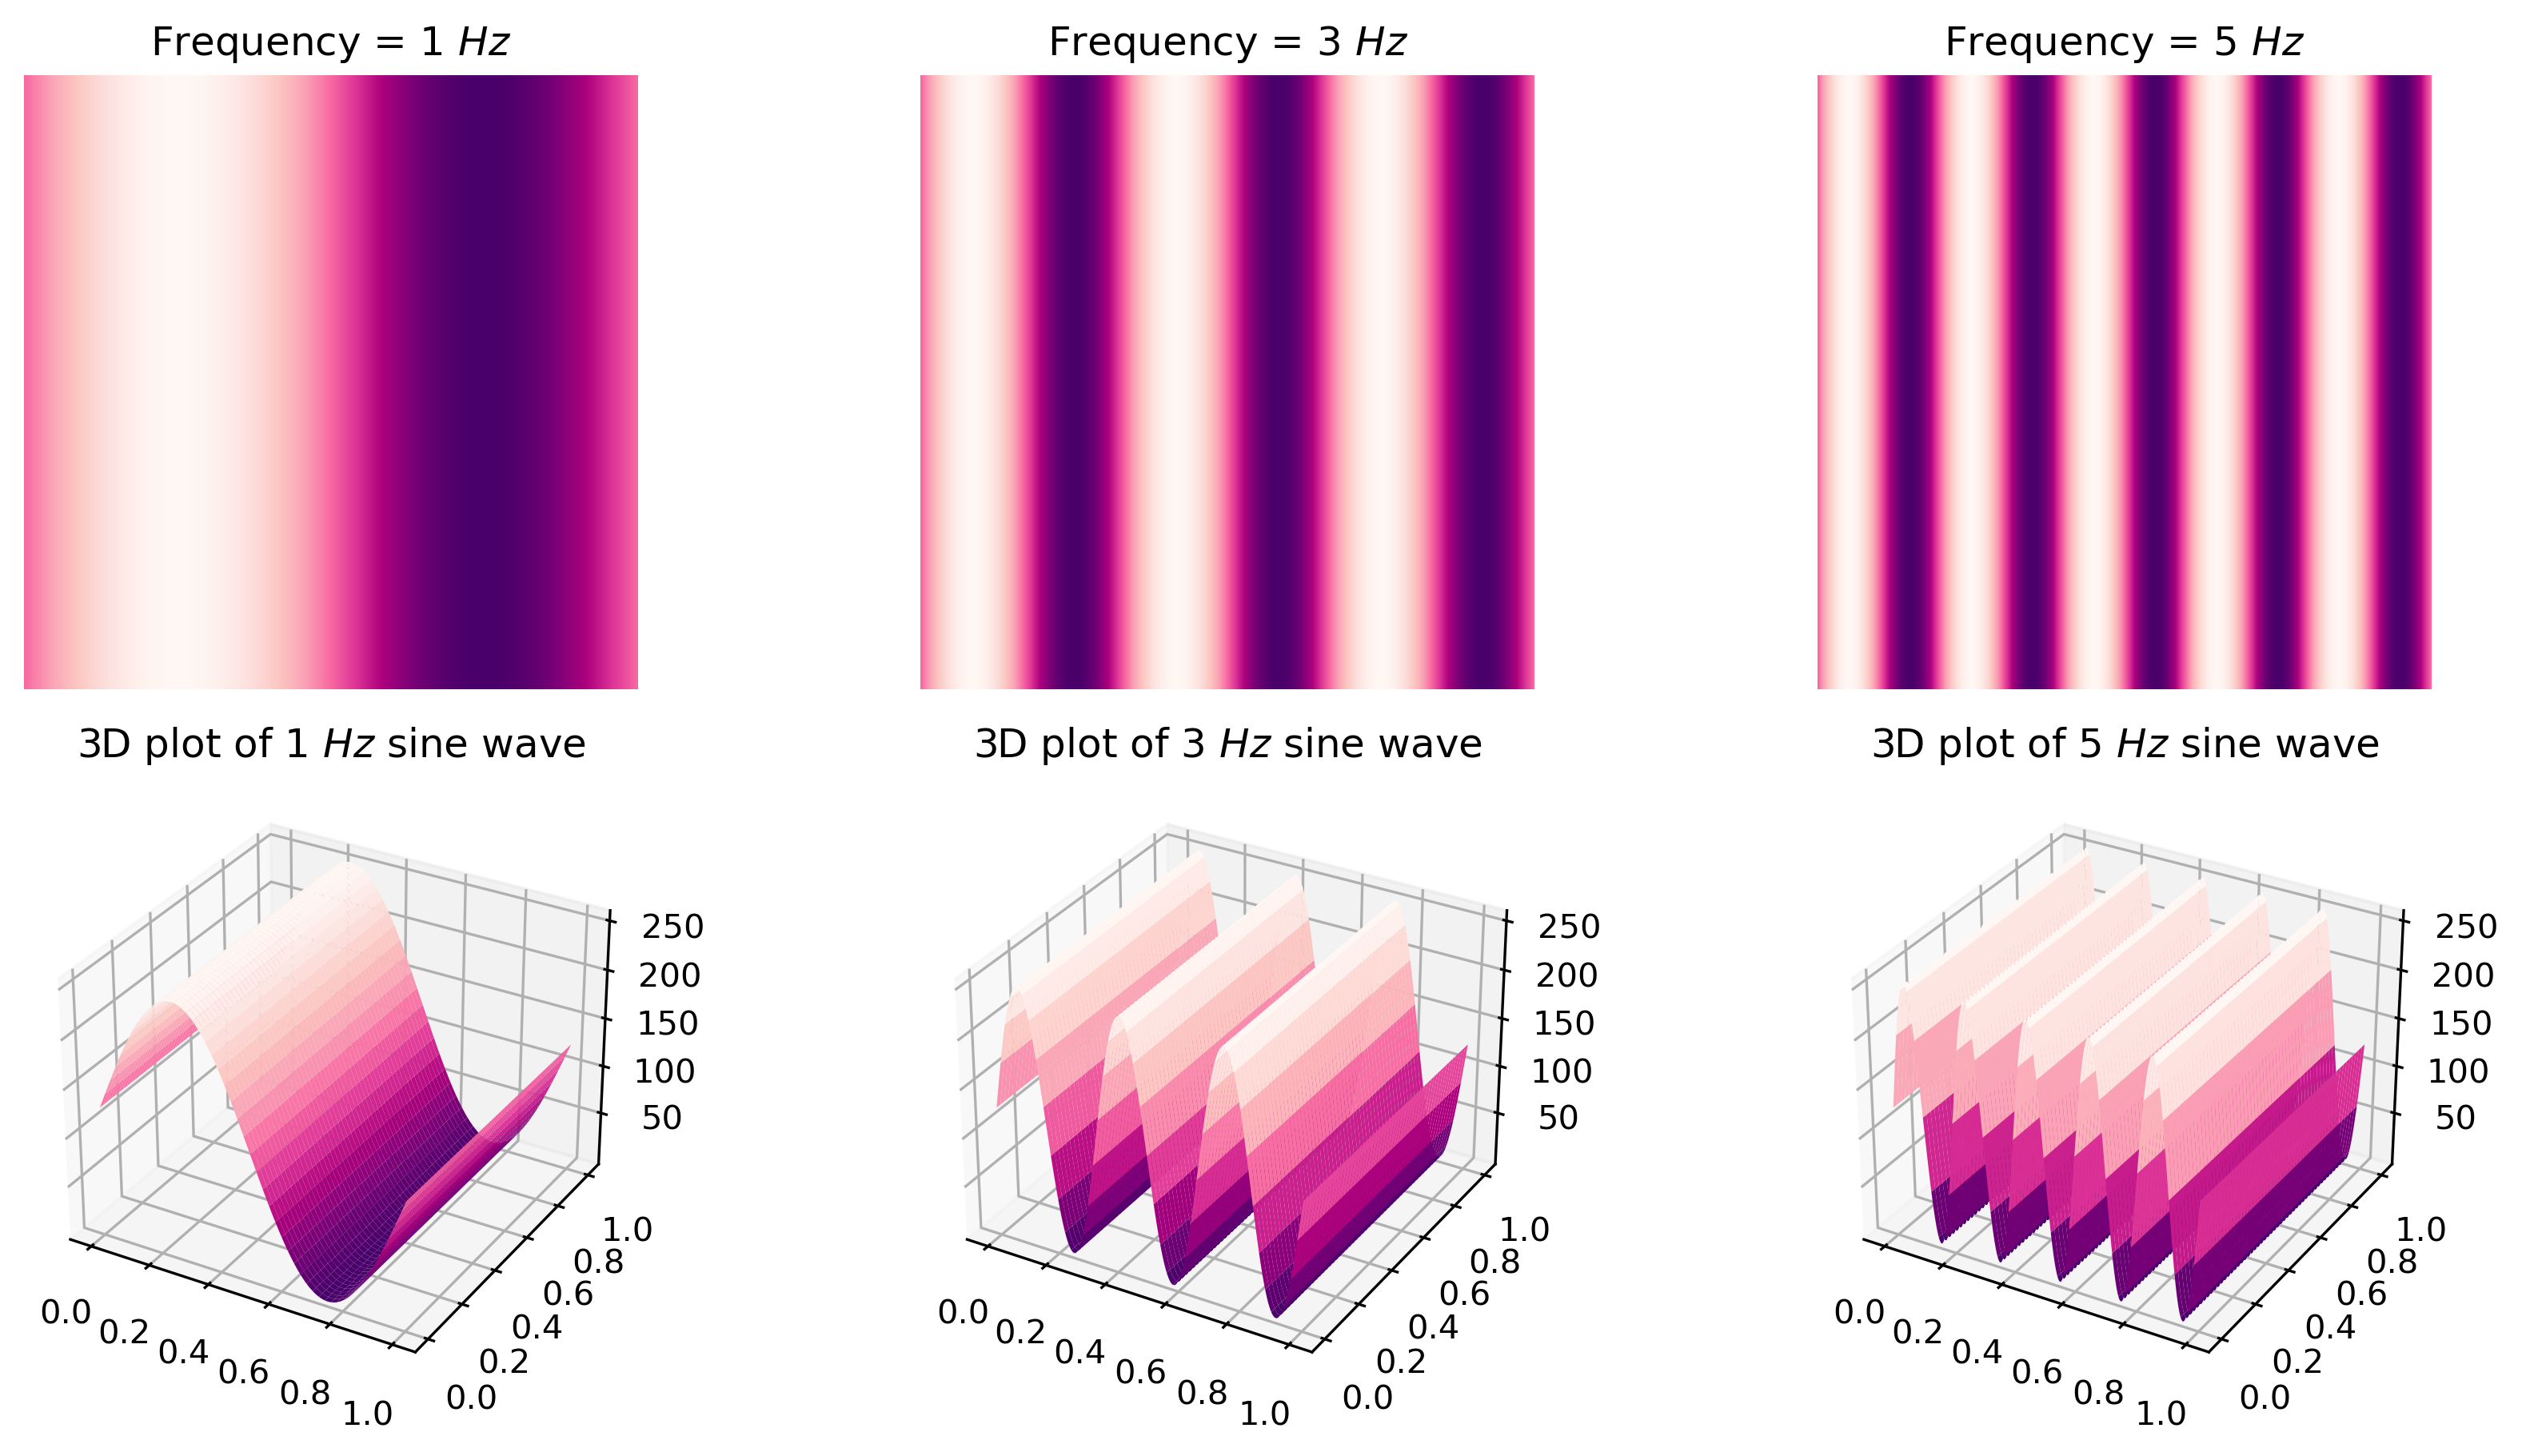

In [7]:
fig = plt.figure(figsize=(12, 6), dpi=300) # Preliminaries for creating subfigures.
j = -1 # Serves as my index for the frequency of the sinusoids.

for i in range(1, 4): # I want my code to iterate on [1, 2, 3].
    j+=2 # But I want my index for the sinusoids to iterate on [1, 3, 5].

    N = 400 # Creating meshgrid.
    xx = np.linspace(0, 1, N)
    X, Y = np.meshgrid(xx, xx)
    A = 255

    sin = (0.5*np.sin((2*np.pi*X)*j) + 0.5)*A # Creating iterable sinusoid function.

    plt.subplot(2, 3, i) # Creating subplots for the 2D images. Iterates on [1, 2, 3], hence first 3 plots.

    plt.title(f'Frequency = {j} $Hz$') # Plotting 2D images on the subplots.
    plt.axis('off')  
    plt.imshow(sin, cmap='RdPu_r')

    ax = fig.add_subplot(2, 3, i+3, projection='3d') # Creating subplots for the 3D images. Iterates on [4, 5, 6], hence last 3 plots.
    ax.set_title(f'3D plot of {j} $Hz$ sine wave') # Plotting the 3D images on the subplots.
    ax.plot_surface(X, Y, sin, cmap='RdPu_r')   
    ax.grid(True) 

plt.tight_layout() # tight_layout for optimizing spacing.
plt.show() # Displaying.


#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

##### Author's note

For my Olympic rings, I followed their logo's color scheme from 2010-onwards where the yellow ring is turned more orange and the colors are generally darker. To achieve this, I kept all channels (R, G, B) on even for the red, blue, and green rings. 

I played around with the ratio of colors per ring to achieve not just the color, but the desired shade (to the best that I can). This also has the added effect of making the color darker. In the real image, keeping all 3 channels makes it brighter; therefore, in inverse the colors appear darker. I employed a color wheel to guide me in manipulating the ratios between the channels.

I disliked the appearance of the tick labels and the square proportions of the plot, so I adjusted them accordingly to fit my aesthetic sense. I made the plot rectangular by setting a y-limit, and removed the tick labels by passing an empty list on xticks and yticks.

Interestingly, this has also removed the overlap of colors where the rings intersect. I do not completely understand why this occurs, but it is a welcome effect. To this point, I leave this note to myself to ask the instructors why this happens in the future.

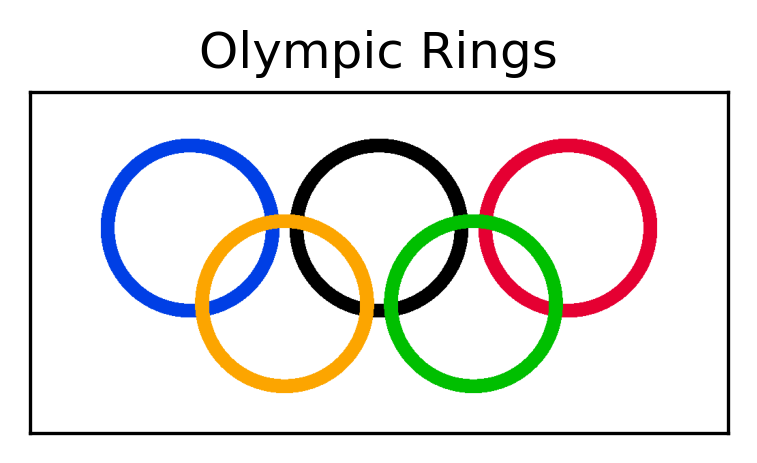

In [8]:
N = 1024 # Creating the meshgrid.
x = np.linspace(-15, 15, N)
y = x
X, Y = np.meshgrid(x, y)

Rd, Gn, Bl = np.zeros((N, N)), np.zeros((N, N)), np.zeros((N, N)) # 

Rt, Rc = 3.25, 3.85# Setting our outer and inner radii.

xt, yt = 1.25*Rt, Rt # Defining the variables for shifting our circles. These seem to yield the best spacing.

# Upper center, black ring
R = np.sqrt((X) ** 2 + (Y) ** 2) # X and Y are not manipulated as this serves as our center ring.
Rd[np.where((R < Rc) & (R >= Rt))] = 1.0
Gn[np.where((R < Rc) & (R >= Rt))] = 1.0
Bl[np.where((R < Rc) & (R >= Rt))] = 1.0

# Upper left, blue ring
R = np.sqrt((X + 2*xt) ** 2 + (Y) ** 2) # X is shifted to the left by 2*xt, Y is unchanged.
Rd[np.where((R < Rc) & (R >= Rt))] = 1.0
Gn[np.where((R < Rc) & (R >= Rt))] = 0.75
Bl[np.where((R < Rc) & (R >= Rt))] = 0.1

# Upper right, red ring
R = np.sqrt((X - 2*xt) ** 2 + (Y) ** 2) # X is shifted to the right by 2*xt, Y is unchanged.
Rd[np.where((R < Rc) & (R >= Rt))] = 0.1
Gn[np.where((R < Rc) & (R >= Rt))] = 1.0
Bl[np.where((R < Rc) & (R >= Rt))] = 0.8

# Lower left, orange ring
R = np.sqrt((X + xt) ** 2 + (Y - yt) ** 2) # X is shifted to the left by xt, Y is shifted down by yt.
Rd[np.where((R < Rc) & (R >= Rt))] = 0.01
Gn[np.where((R < Rc) & (R >= Rt))] = 0.35
Bl[np.where((R < Rc) & (R >= Rt))] = 1.0

# Lower right, green ring
R = np.sqrt((X - xt) ** 2 + (Y - yt) ** 2) # X is shifted to the right by xt, Y is shifted down by yt.
Rd[np.where((R < Rc) & (R >= Rt))] = 1.0
Gn[np.where((R < Rc) & (R >= Rt))] = 0.25
Bl[np.where((R < Rc) & (R >= Rt))] = 1.0


I_rgb = np.zeros((N, N, 3)) # Creating the 3D array that serves as our image.
I_rgb[..., 0] = Rd
I_rgb[..., 1] = Gn
I_rgb[..., 2] = Bl

plt.figure(figsize=(3, 1.5), dpi=300) # Plotting the image.
plt.imshow(1-I_rgb)
plt.ylim(812, 312)
plt.title("Olympic Rings")
plt.xticks([])
plt.yticks([])
plt.show()

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

c:\Users\David\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


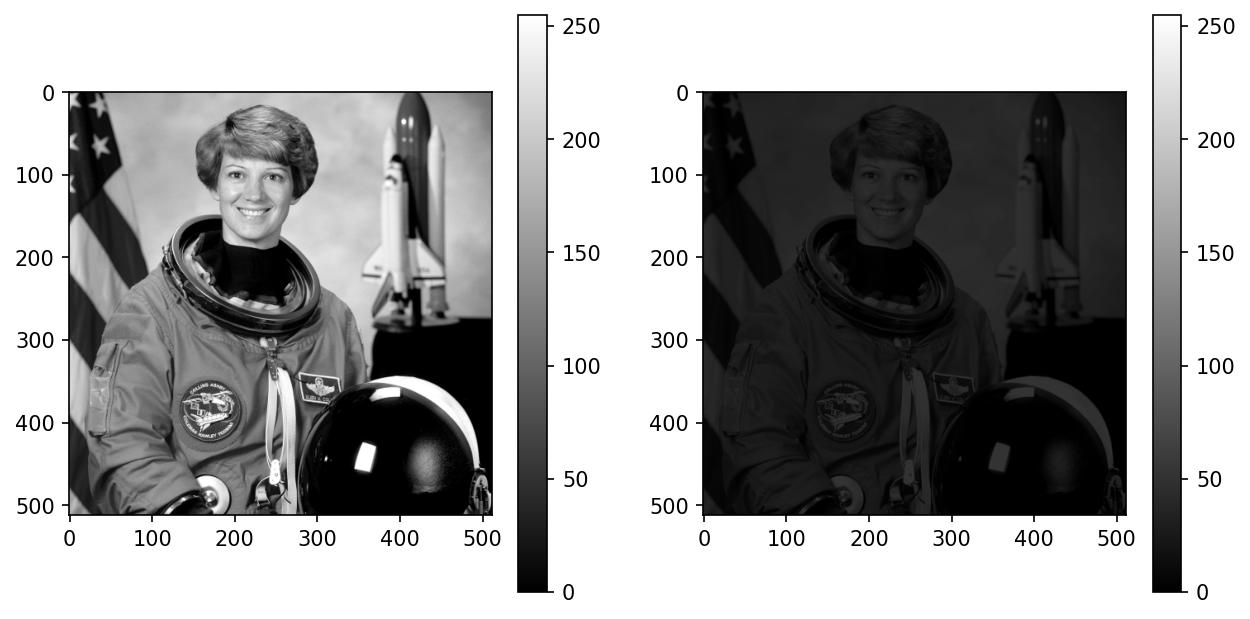

In [9]:
from skimage import color, data, exposure
from skimage.transform import rescale
import skimage as ski

img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 150)
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.

##### Author's note

I first defined the following functions: <code>con_stretch</code> for contrast stretching using the contrast stretching formula, <code>hister</code> for taking the necessary variables for plotting the PDF and CDF of the images.

I then run these functions over <code>img_low_contrast</code> which is the dimmed astronaut image.

In [10]:
def con_stretch(img): # Function takes image "img" as input.
    img_s = img*((255-0)/(np.max(img)-np.min(img))) # Contrast stretching.
    return img_s # Returns contrast stretched image as output.

def hister(img, p): # Function takes image "img" and pixel range "p" as inputs.
    hist, bins = np.histogram(img.flatten(), p, [np.min(range(p)), np.max(range(p))]) # hist for CDF plot, bins for PDF plot.
    cdf = hist.cumsum() # Take cumulative sum.
    cdf_norm = cdf / np.max(cdf) # cdf_norm for CDF plot.
    plot_hist = img.flatten() # plot_hist for PDF plot.

    return plot_hist, bins, cdf_norm

In [11]:
astro_stretch = con_stretch(img_low_contrast) # Contrast stretching implementation via the function con_stretch.

hist1, bins1, cdf_norm1 = hister(img_low_contrast, 256) # Extracting the necessary data for plotting PDF and CDF.
hist2, bins2, cdf_norm2 = hister(astro_stretch, 256) 

Then I plot the original image, contrast stretched image, and the PDFs and CDFs of both images for comparison.

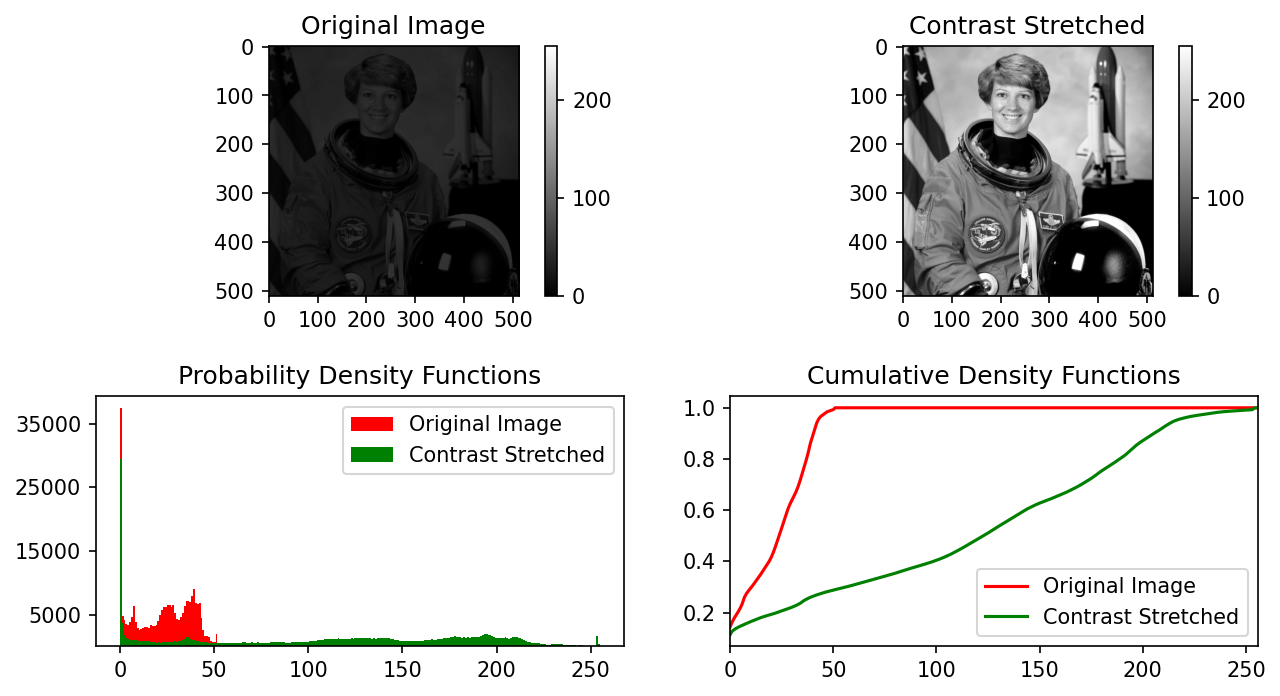

In [12]:
plt.figure(figsize=(10,5), dpi = 150) # Preliminaries for creating the subplots.

plt.subplot(221) # Plotting the original image in the top left subplot.
plt.title("Original Image")
plt.xticks([i for i in np.arange(0, 513, 100)]) # Specifying xticks for a better-looking plot.
plt.yticks([i for i in np.arange(0, 513, 100)])
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

plt.subplot(222) # Plotting the contrast stretched image in the top right subplot.
plt.title("Contrast Stretched")
plt.xticks([i for i in np.arange(0, 513, 100)]) # Specifying xticks for a better-looking plot.
plt.yticks([i for i in np.arange(0, 513, 100)])
plt.imshow(astro_stretch, cmap = 'gray', vmax = 255)
plt.colorbar()

plt.subplot(223) # Plotting the PDFs in the bottom left subplot.
plt.title("Probability Density Functions")
plt.yticks([i for i in np.arange(5000, 35001, 10000)]) # Specifying yticks for a better-looking plot.
plt.hist(hist1, bins1, [0, 256], color='red', label='Original Image')
plt.hist(hist2, bins2, [0, 256], color='green', label='Contrast Stretched')
plt.legend()

plt.subplot(224) # Plotting the CDFs in the bottom right subplot.
plt.title("Cumulative Density Functions")
plt.plot(cdf_norm1, color='red', label='Original Image')
plt.plot(cdf_norm2, color='green', label='Contrast Stretched')
plt.xlim(0, 256) # Delimiting the plot to make it look better.
plt.legend()

plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
plt.show()

#### Contrast Stretching on different manga panels.

I am a huge manga nerd, so I want to try this type of image processing on some of my favorite manga panels. This is also to test how well the defined functions work.

Here I import an image of one of my favorite manga panels ever. I then dim the image and act the functions on it.

I first plot the imported image vs the dimmed image. After that, I plot results similar to the astronaut image.

In [13]:
makima_og = ski.io.imread("b3_imgs/makima_halo.jpg", as_gray=True)*256 # Importing desired image.
makima_dim = makima_og/10 # Dimming.

makima = con_stretch(makima_dim) # Using the functions just as in initial run.
hist3, bins3, cdf_norm3 = hister(makima_dim, 256)
hist4, bins4, cdf_norm4 = hister(makima, 256)

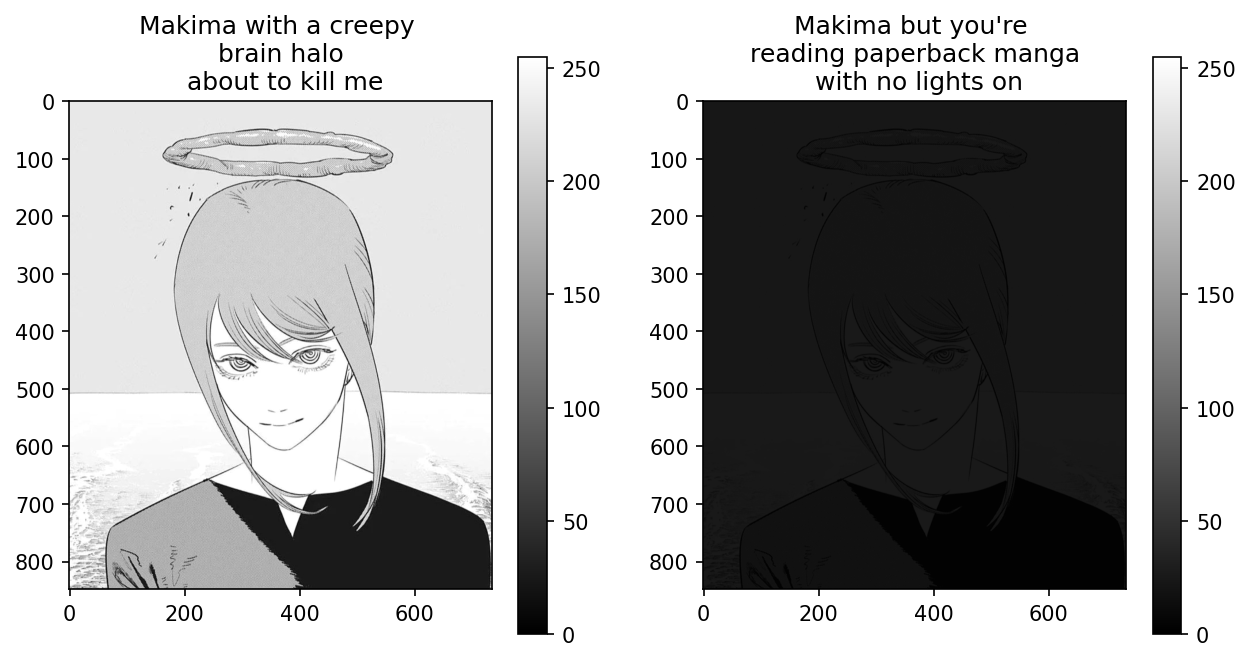

In [14]:
plt.figure(figsize=(10,5), dpi = 150) # Comparing imported image to dimmed image.

plt.subplot(121)
plt.title("Makima with a creepy \n brain halo \n about to kill me")
plt.imshow(makima_og, cmap = 'gray', vmax = 255)
plt.colorbar()

plt.subplot(122)
plt.title("Makima but you\'re \n reading paperback manga \n with no lights on")
plt.imshow(makima_dim, cmap = 'gray', vmax = 255)
plt.colorbar()

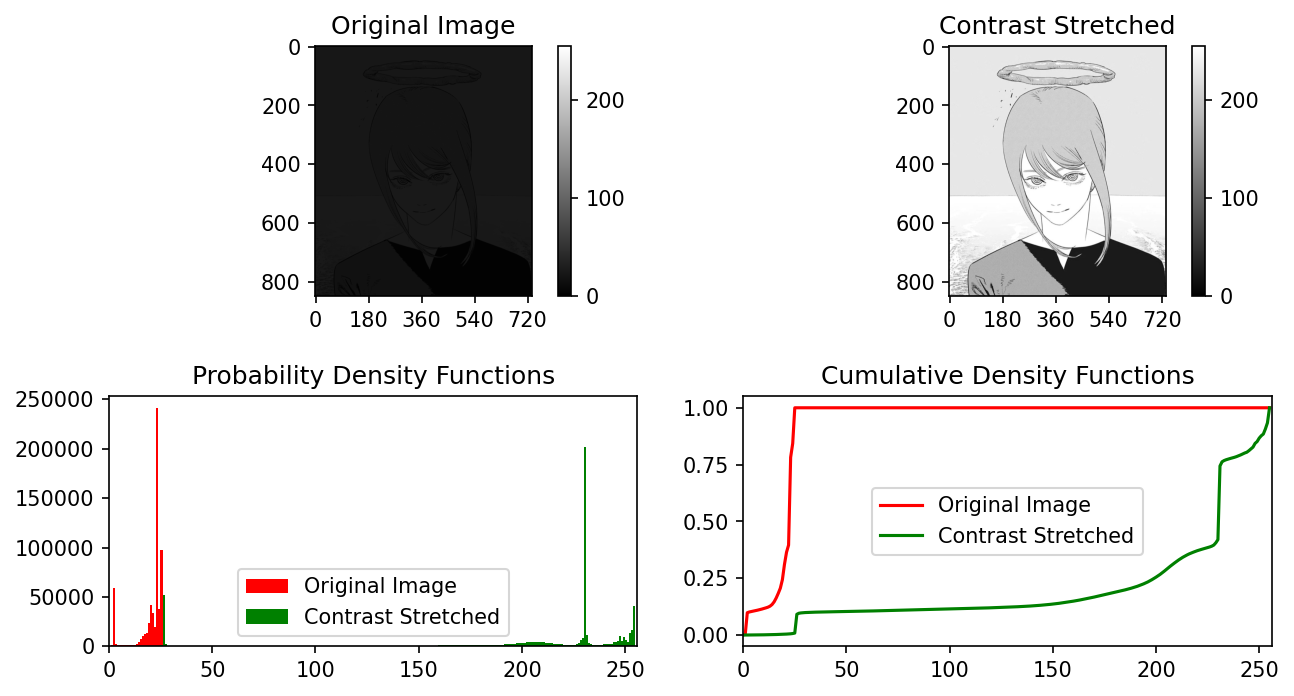

In [15]:
plt.figure(figsize=(10,5), dpi = 150) # Plotting results just as in initial run.
plt.subplot(221)
plt.title("Original Image")
plt.xticks([i for i in np.arange(0, 736, 180)])
plt.imshow(makima_dim, cmap = 'gray', vmax = 255)
plt.colorbar()

plt.subplot(222)
plt.title("Contrast Stretched")
plt.xticks([i for i in np.arange(0, 736, 180)])
plt.imshow(makima, cmap = 'gray', vmax = 255)
plt.colorbar()

plt.subplot(223)
plt.title("Probability Density Functions")
plt.hist(hist3, bins3, [0, 256], color='red', label='Original Image')
plt.hist(hist4, bins4, [0, 256], color='green', label='Contrast Stretched')
plt.yticks([i for i in np.arange(0, 250001, 50000)])
plt.xlim(0, 256)
plt.legend()

plt.subplot(224)
plt.title("Cumulative Density Functions")
plt.plot(cdf_norm3, color='red', label='Original Image')
plt.plot(cdf_norm4, color='green', label='Contrast Stretched')
plt.xlim(0, 256)
plt.legend()

plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
plt.show()

Interestingly, in the PDF of the contrast stretched Makima image, the distribution suggests that the image has very high contrast. There is a peak corresponding to a few "dark" pixel values, then the rest are concentrated on the higher or "lighter" pixel value ranges. This behavior is also shown in the CDF plot where instead of linear, the CDF of the contrast stretched Makima image is more exponential.

Here, I input another one of my favorite manga panels. Or, a fanart of it.

In [16]:
pochita_og = ski.io.imread("b3_imgs/pochita.jpg", as_gray=True)*256
pochita_dim = pochita_og/10

pochita = con_stretch(pochita_dim)
hist5, bins5, cdf_norm5 = hister(pochita_dim, 256)
hist6, bins6, cdf_norm6 = hister(pochita, 256)

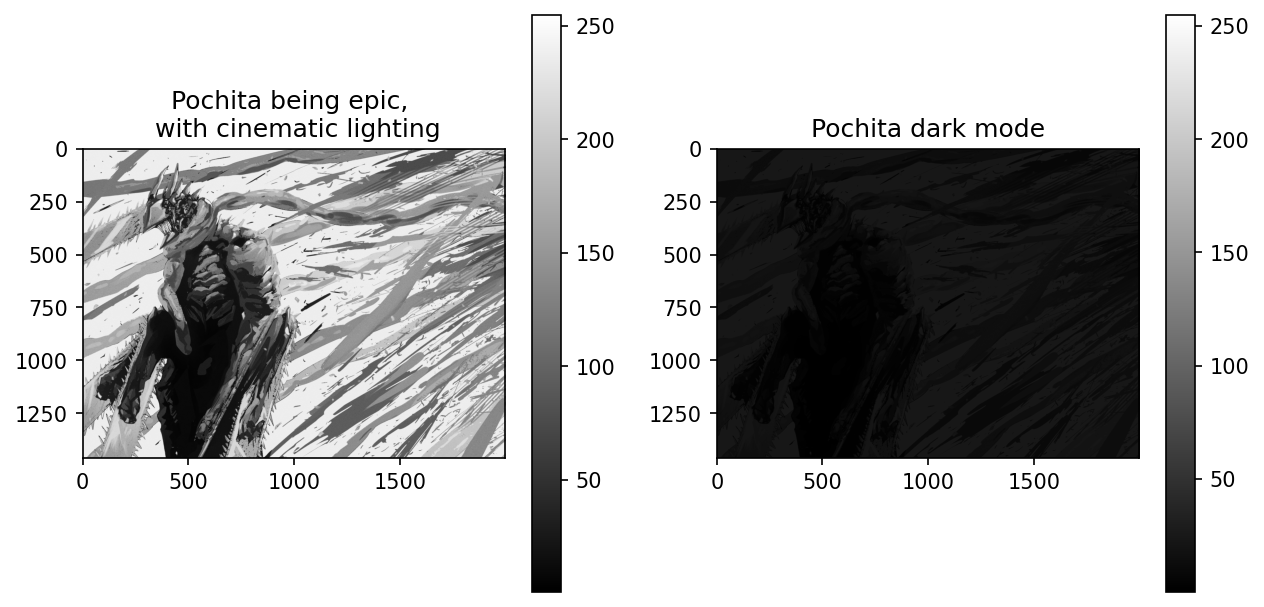

In [17]:
plt.figure(figsize=(10,5), dpi = 150)

plt.subplot(121)
plt.title("Pochita being epic, \n with cinematic lighting")
plt.imshow(pochita_og, cmap='gray', vmax = 255)
plt.colorbar()

plt.subplot(122)
plt.title("Pochita dark mode")
plt.imshow(pochita_dim, cmap = 'gray', vmax = 255)
plt.colorbar()

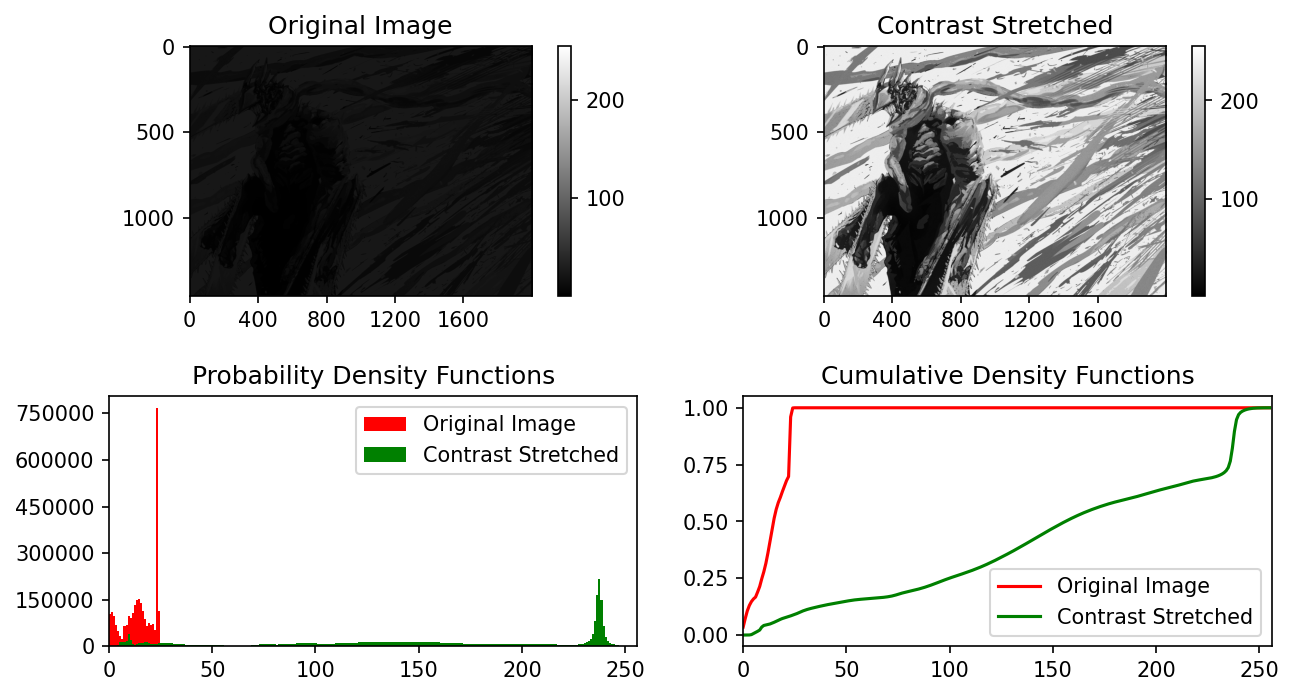

In [18]:
plt.figure(figsize=(10,5), dpi = 150)
plt.subplot(221)
plt.title("Original Image")
plt.xticks([i for i in np.arange(0, 2001, 400)])
plt.imshow(pochita_dim, cmap = 'gray', vmax = 255)
plt.colorbar()

plt.subplot(222)
plt.title("Contrast Stretched")
plt.xticks([i for i in np.arange(0, 2001, 400)])
plt.imshow(pochita, cmap = 'gray', vmax = 255)
plt.colorbar()

plt.subplot(223)
plt.title("Probability Density Functions")
plt.hist(hist5, bins5, [0, 256], color='red', label='Original Image')
plt.hist(hist6, bins6, [0, 256], color='green', label='Contrast Stretched')
plt.yticks([i for i in np.arange(0, 750001, 150000)])
plt.xlim(0, 256)
plt.legend()

plt.subplot(224)
plt.title("Cumulative Density Functions")
plt.plot(cdf_norm5, color='red', label='Original Image')
plt.plot(cdf_norm6, color='green', label='Contrast Stretched')
plt.xlim(0, 256)
plt.legend()

plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
plt.show()

Here we see that the contrast stretched Pochita images also have quite high contrast, but there is also some distribution in the middle pixel values. It's less extreme than the Makima image. This is corroborated by the CDF, which shows a more linear plot for the contrast stretched Pochita image.

Now, in the code cells below, I tried to remove LeBron's sunshine, but unfortunately I failed. He's still my sunshine.

Perhaps backprojection would have been a better method.

In [19]:
lebright = ski.io.imread("b3_imgs/lebron.jpeg", as_gray=True)*256

lebron = lebright*((np.max(lebright)-np.min(lebright)))/(255-0)

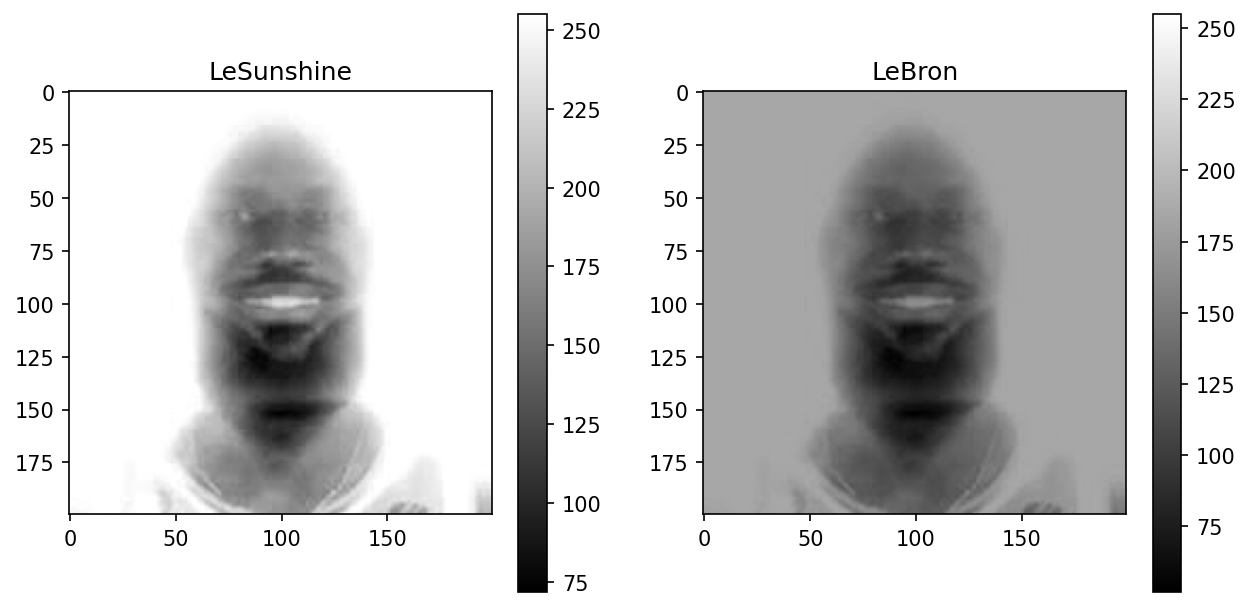

In [20]:
plt.figure(figsize=(10,5), dpi = 150)

plt.subplot(121)
plt.title("LeSunshine")
plt.imshow(lebright, cmap='gray', vmax = 255)
plt.colorbar()

plt.subplot(122)
plt.title("LeBron")
plt.imshow(lebron, cmap = 'gray', vmax = 255)
plt.colorbar()